<a href="https://colab.research.google.com/github/hoon-i/ML-with-Math/blob/main/hands_on_machine_learning_practice1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 핸즈온 머신러닝 교제 180p ~ 207p

- 4.1.1 정규방정식

In [1]:
import numpy as np  #numpy 라이브러리 불러오기

np.random.seed(42) #난수 결과 고정
m = 100 #샘플 개수
x = 2 * np.random.rand(m, 1) #numpy array 생성
y = 4 + 3 * x + np.random.randn(m, 1) #numpy array 생성

print(x)
print(y)

[[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]
 [0.31198904]
 [0.11616722]
 [1.73235229]
 [1.20223002]
 [1.41614516]
 [0.04116899]
 [1.9398197 ]
 [1.66488528]
 [0.42467822]
 [0.36364993]
 [0.36680902]
 [0.60848449]
 [1.04951286]
 [0.86389004]
 [0.58245828]
 [1.22370579]
 [0.27898772]
 [0.5842893 ]
 [0.73272369]
 [0.91213997]
 [1.57035192]
 [0.39934756]
 [1.02846888]
 [1.18482914]
 [0.09290083]
 [1.2150897 ]
 [0.34104825]
 [0.13010319]
 [1.89777107]
 [1.93126407]
 [1.6167947 ]
 [0.60922754]
 [0.19534423]
 [1.36846605]
 [0.88030499]
 [0.24407647]
 [0.99035382]
 [0.06877704]
 [1.8186408 ]
 [0.51755996]
 [1.32504457]
 [0.62342215]
 [1.04013604]
 [1.09342056]
 [0.36970891]
 [1.93916926]
 [1.55026565]
 [1.87899788]
 [1.7896547 ]
 [1.19579996]
 [1.84374847]
 [0.176985  ]
 [0.39196572]
 [0.09045458]
 [0.65066066]
 [0.77735458]
 [0.54269806]
 [1.65747502]
 [0.71350665]
 [0.56186902]
 [1.08539217]
 [0.28184845]
 [1.60439396]
 [0.14910129]
 [1.97377387]
 [1.54448954]
 [0.39

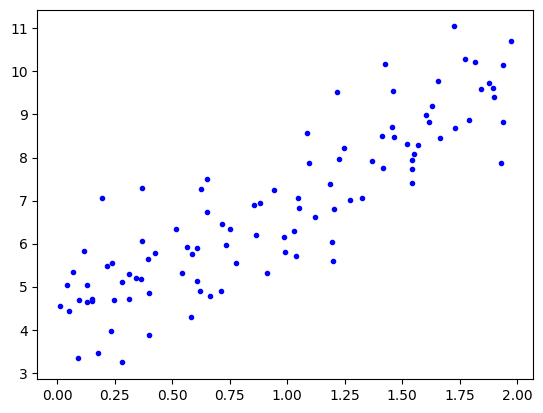

In [2]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'b.') #x,y 분포 그래프로(점으로) 표현
plt.show() #그래프 보여주기

In [3]:
from sklearn.preprocessing import add_dummy_feature #sklearn.preprocessing 으로부터 add_dummy_fearture 가져오기.

x_b = add_dummy_feature(x) # 각 샘플에 x0=1을 추가
theta_best = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y # inv() 함수를 통해 역행렬 계산

''' "@" 연산자는 행렬의 곱샘을 수행.
두 행렬이 numpy array일 경우에 np.matmul(A,B)와 동일.
pytorch등에서도 @연산자 지원.
python에서는 지원하지 않음.'''

print(theta_best)

[[4.21509616]
 [2.77011339]]


In [4]:
x_new = np.array([[0],[2]]) #[[0],[2]] array 생성
x_new_b = add_dummy_feature(x_new) # x_new_b 정의
y_predict = x_new_b @ theta_best # x_new_b 와 theta_best 행렬 곱
print(y_predict)

[[4.21509616]
 [9.75532293]]


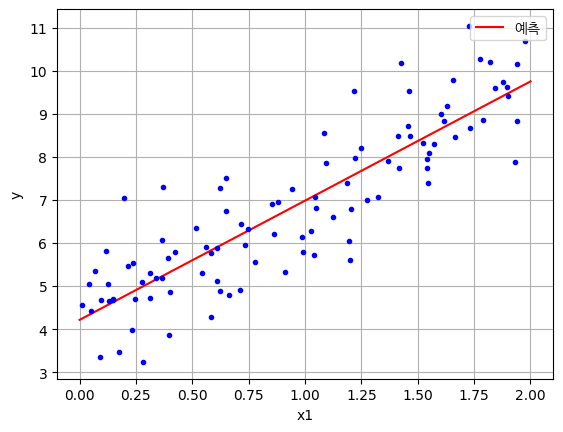

In [5]:
import matplotlib.pyplot as plt

plt.plot(x_new, y_predict, "r-", label = "예측") # 예측 직선 색을 빨간색으로 설정하고 범례를 '예측'으로 설정
plt.plot(x, y, "b.")

plt.rc('font',family='NanumGothic') #한글 폰트가 깨져서 폰트설정, 만약 다운로드 안되어 있으면 아래 셀 확인.

plt.xlabel('x1') #x축 레이블을 x1으로 설정
plt.ylabel('y') #y축 레이블을 y로 설정
plt.legend() #그래프에 범례('예측')를 추가
plt.grid(True) #그래프의 그리드 설정


plt.show()

In [6]:
# @title 만약 한글 폰트가 깨진다면 아래의 방법 수행.

#코랩에 nanum 폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#이후 런타임 재시작 후 한글 폰트 설정
#plt.rc('font',family='NanumGothic')


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (31.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121753 files and direc

In [6]:
from sklearn.linear_model import LinearRegression #sklearn에서 선형회귀 모델 불러오기
lin_reg = LinearRegression() #모델 초기화
lin_reg.fit(x,y) # x,y 데이터를 불러오기
print(lin_reg.intercept_, lin_reg.coef_) #coef_ : 회귀계수, intercept_ : 속성을 통해 절편항 정보를 가져오기.
print(lin_reg.predict(x_new))#예측값 얻는다

[4.21509616] [[2.77011339]]
[[4.21509616]
 [9.75532293]]


In [7]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6) #np.linalg.lstsq : 최소제곱

print(theta_best_svd)

print(np.linalg.pinv(x_b) @ y) #np.linalg.pinv : 유사 역행렬(무어-펜로즈) 구하기
'''유사역행렬은 특잇값 분해(svd)기법을 사용해서 계산됨.'''

[[4.21509616]
 [2.77011339]]
[[4.21509616]
 [2.77011339]]


'유사역행렬은 특잇값 분해(svd)기법을 사용해서 계산됨.'

- 4.1.2 계산 복잡도


In [8]:
#경사하강법의 스탭

eta = 0.1 #학습률
n_epochs = 1000 #반복횟수
m = len(x_b) #len()함수를 사용해 x_b개수를 구함

np.random.seed(42) #난수 고정
theta = np.random.randn(2,1) #난수를 이용해서 파라미터를 초기화

for epoch in range(n_epochs): #반복횟수는 n_epochs = 1000 까지 1000번 반복
  gradients = 2 / m * x_b.T @ (x_b @ theta - y)
  theta = theta -eta * gradients

print(theta)

[[4.21509616]
 [2.77011339]]


In [9]:
#확률적 경사 하강법 구현

n_epochs = 50
t0, t1 = 5, 50 #학습 스케줄 하이퍼파라미터

def learning_schedule(t): #learning_schedule 함수 정의
  return t0 / (t + t1) #함수의 return 값이 t0 / (t + t1)

np.random.seed(42) #난수 고정
theta = np.random.randn(2, 1) #난수 초기화

for epoch in range(n_epochs): #epoch 을 n_epochs 까지 반복
  for iteration in range(m): # iteration 은 m 까지 반복
    random_index = np.random.randint(m) #m 까지의 숫자 중에서 랜덤으로 1개 뽑기
    xi = x_b[random_index:random_index + 1] #index에 해당하는 수를 x-b에서 뽑기
    yi = y[random_index:random_index + 1] #index에 해당하는 수를 y에서 뽑기
    gradients = 2 * xi.T @ (xi @ theta - yi) #경사 계산 SGD에서는 m으로 나누지 않는다
    eta = learning_schedule(epoch * m + iteration) #learning_schedule 함수를 호출
    theta = theta - eta * gradients #파라미터 초기화

  print(theta)

[[4.34170752]
 [2.95978149]]
[[4.18374543]
 [2.76037786]]
[[4.03850686]
 [2.86106602]]
[[4.08578431]
 [2.80674319]]
[[4.17639906]
 [2.83889955]]
[[4.21841631]
 [2.79647827]]
[[4.21387951]
 [2.82036856]]
[[4.23097339]
 [2.86892194]]
[[4.22347692]
 [2.78478717]]
[[4.19540063]
 [2.79306016]]
[[4.20406798]
 [2.78556912]]
[[4.22358433]
 [2.75130941]]
[[4.25966823]
 [2.7515771 ]]
[[4.2158731 ]
 [2.70271043]]
[[4.24748116]
 [2.78978592]]
[[4.19094826]
 [2.7964367 ]]
[[4.13270331]
 [2.74642708]]
[[4.18640378]
 [2.81412386]]
[[4.20712572]
 [2.80431384]]
[[4.17892481]
 [2.77639082]]
[[4.20185522]
 [2.79154663]]
[[4.23386305]
 [2.82749384]]
[[4.24577487]
 [2.83236365]]
[[4.20081987]
 [2.78664637]]
[[4.19339773]
 [2.76102409]]
[[4.25109976]
 [2.83014283]]
[[4.26544015]
 [2.80922197]]
[[4.26080389]
 [2.78230918]]
[[4.2484261 ]
 [2.77279922]]
[[4.22946012]
 [2.75748854]]
[[4.2187385 ]
 [2.73605254]]
[[4.25793903]
 [2.78542844]]
[[4.26719894]
 [2.80754787]]
[[4.23931814]
 [2.77914863]]
[[4.23981212]


In [10]:
from sklearn.linear_model import SGDRegressor #scikit-learn에서 SGDRegressor 모델 불러오기

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
'''
max_iter: 최대 반복 횟수
tol: 종료 기준 -> 최적화 과정 중에 목적 함수의 변화가 이 값보다 작아지면 최적화를 종료
penalty: 규제 항 설정 -> None으로, 규제를 사용하지 않음
eta0: 학습률의 초기값
n_iter_no_change: 허용된 반복 횟수 내에서 손실이 향상되지 않을 경우 조기 중지를 위한 반복 횟수
random_state: 난수 생성 시드(난수 고정)
'''
sgd_reg.fit(x, y.ravel()) #sgd_reg에 x, y.ravel()에 해당하는 데이터 불러옴

print(sgd_reg.intercept_, sgd_reg.coef_)

[4.21278812] [2.77270267]


- 4.2.3 미니배치 경사 하강법
- 4.3 다항 회귀

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


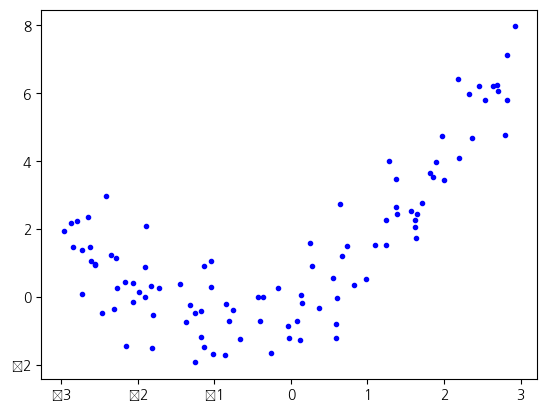

In [11]:
np.random.seed(42)
m = 100
x = 6 * np.random.rand(m,1) - 3
y = 0.5 * x ** 2 + x + np.random.randn(m,1) #간단한 이차방정식 0.5x^2 + x + c 정의

plt.plot(x, y, 'b.') #x,y 분포 그래프로(점으로) 표현
plt.show() #그래프 보여주기

In [12]:
from sklearn.preprocessing import PolynomialFeatures #PolynomialFeatures를 불러옴

poly_features = PolynomialFeatures(degree=2, include_bias=False) #PolynomialFeatures의 다항식 차수 2 차식, 절편 포함 x
x_poly = poly_features.fit_transform(x) # x의 데이터를 불러오기 및 적용
print(x[0])
print(x_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]


In [13]:
lin_reg = LinearRegression() #lin_reg 초기화
lin_reg.fit(x_poly, y) # lin_reg에 x_poly와 y의 데이터 사용

lin_reg.intercept_, lin_reg.coef_ #coef_ : 회귀계수, intercept_ : 속성을 통해 절편항 정보를 가져오기.

(array([-0.21865419]), array([[0.93366893, 0.56456263]]))

- 4.4 학습곡선

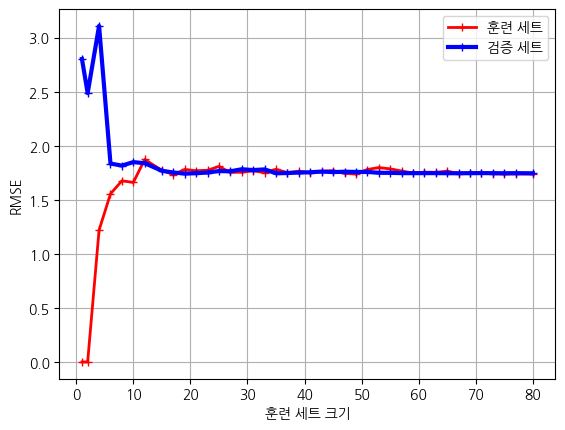

In [14]:
from sklearn.model_selection import learning_curve #sklearn에서 learning_curve 불러오기

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), x, y, train_sizes=np.linspace(0.01,1.0,40), cv = 5,
    scoring="neg_root_mean_squared_error") #learning_curve() 함수에 매개변수 설정, np.linspace(0.01, 1.0, 40)은 데이터 집합 크기의 1%에서 100% 사이에서 균일하게 간격을 둔 40개의 값을 사용한다라는 뜻이고 cv=5는 5-flod cross validation이다.
train_errors = -train_scores.mean(axis=1) #평균을 계산
valid_errors = -valid_scores.mean(axis=1) #평균을 계산

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="훈련 세트") #그래프 그리기 옵션 설정
plt.plot(train_sizes, valid_errors, "b-+", linewidth=3, label="검증 세트") #그래프 그리기 옵션 설정

plt.rc('font',family='NanumGothic') #한글 폰트가 깨져서 폰트설정

plt.xlabel('훈련 세트 크기') #x축 레이블을 x1으로 설정
plt.ylabel('RMSE') #y축 레이블을 y로 설정
plt.legend() #그래프에 범례('예측')를 추가
plt.grid(True) #그래프의 그리드 설정


plt.show()

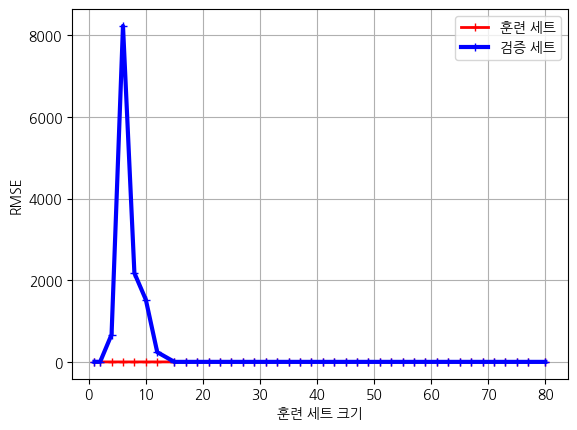

In [15]:
#10차 다항 회귀 모델 학습 곡선 그리기

from sklearn.pipeline import make_pipeline #sklearn에서 make_pipeline 불러오기

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()) #make_pipeline 함수를 통해 절편이 없는 10차식을 생성하고 이를 선형회귀에 사용

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, x, y, train_sizes=np.linspace(0.01,1.0,40), cv = 5,
    scoring="neg_root_mean_squared_error") #위와 동일하고 polynomial_regression만 다르다.

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="훈련 세트")
plt.plot(train_sizes, valid_errors, "b-+", linewidth=3, label="검증 세트")

plt.rc('font',family='NanumGothic') #한글 폰트가 깨져서 폰트설정, 만약 다운로드 안되어 있으면 아래 셀 확인.

plt.xlabel('훈련 세트 크기') #x축 레이블을 x1으로 설정
plt.ylabel('RMSE') #y축 레이블을 y로 설정
plt.legend() #그래프에 범례('예측')를 추가
plt.grid(True) #그래프의 그리드 설정


plt.show()

- 4.5 규제가 있는 선형 모델
- 4.5.1 릿지 회귀

In [16]:
#릿지 회귀
from sklearn.linear_model import Ridge #sklearn에서 Ridge 함수 불러옴

ridge_reg = Ridge(alpha=0.1, solver="cholesky") #Ridge 함수에서 alpha값이 0.1이고 cholesky 행렬분해를 사용
ridge_reg.fit(x,y)
ridge_reg.predict([[1.5]]) #값 예측

array([[2.82899748]])

In [20]:
#확률적 경사 하강법을 사용한 릿지 회귀
sgd_reg = SGDRegressor(penalty='l2', alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42) #l2로 지정함으로서 alpha/m 하는 것으로 릿지회귀와 동일하게 만들었음.
sgd_reg.fit(x, y.ravel())
sgd_reg.predict([[1.5]])

array([2.82830117])